In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data_brut = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X = data_brut[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut = data_brut[[9]]
data_brut.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


In [2]:
#X.describe()

In [3]:
y_transform = y_brut
#y_transform.replace('o', -1)
#y_transform.replace('n', 1)
y_transform = np.where(y_transform=='o',-1,1)
#y_transform

In [4]:
y_outliers = data_brut[data_brut[9] == "o"]
len(y_outliers)

878

In [5]:
y_transform_outliers = y_transform[y_transform == -1]
len(y_transform_outliers)

878

In [6]:
y_normals = data_brut[data_brut[9] == "n"]
len(y_normals)

45586

In [7]:
y_transform_normals = y_transform[y_transform == 1]
len(y_transform_normals)

45586

In [8]:
len(y_outliers) + len(y_normals)

46464

In [9]:
len(y_transform_outliers) + len(y_transform_normals)

46464

In [41]:
#RandomizedSearchCV took 5126.32 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.065 (std: 0.130)
#Parameters: {'verbose': False, 'tol': 0.519, 'shrinking': True, 'random_state': None, 'nu': 0.8, 'max_iter': 20, 'kernel': 'linear', 'gamma': 'scale', 'degree': 6, 'coef0': 0.7000000000000001, 'cache_size': 200}

#Model with rank: 2
#Mean validation score: 0.064 (std: 0.128)
#Parameters: {'verbose': False, 'tol': 0.376, 'shrinking': True, 'random_state': None, 'nu': 0.6, 'max_iter': 20, 'kernel': 'linear', 'gamma': 'scale', 'degree': 6, 'coef0': 0.9, 'cache_size': 200}

#Model with rank: 3
#Mean validation score: 0.064 (std: 0.127)
#Parameters: {'verbose': False, 'tol': 0.101, 'shrinking': True, 'random_state': None, 'nu': 0.30000000000000004, 'max_iter': 20, 'kernel': 'linear', 'gamma': 'scale', 'degree': 8, 'coef0': 0.2, 'cache_size': 200}


#RandomizedSearchCV took 3102.66 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.066 (std: 0.132)
#Parameters: {'verbose': False, 'tol': 0.359, 'shrinking': True, 'random_state': None, 'nu': 0.8, 'max_iter': 20, 'kernel': 'poly', 'gamma': 'scale', 'degree': 6, 'coef0': 0.30000000000000004, 'cache_size': 200}

#Model with rank: 2
#Mean validation score: 0.066 (std: 0.132)
#Parameters: {'verbose': False, 'tol': 0.556, 'shrinking': True, 'random_state': None, 'nu': 0.8, 'max_iter': 20, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'coef0': 0.4, 'cache_size': 200}

#Model with rank: 3
#Mean validation score: 0.064 (std: 0.129)
#Parameters: {'verbose': False, 'tol': 0.659, 'shrinking': True, 'random_state': None, 'nu': 0.7000000000000001, 'max_iter': 20, 'kernel': 'poly', 'gamma': 'scale', 'degree': 4, 'coef0': 0.6000000000000001, 'cache_size': 200}

from sklearn.svm import OneClassSVM

cache_size = 200
coef0 = 0.30000000000000004
degree = 6
gamma = 'scale'
kernel = 'poly'
max_iter = 20
nu = 0.8
random_state = None
shrinking = True
tol = 0.359
verbose = False

func = OneClassSVM(cache_size=cache_size, coef0=coef0, degree=degree, 
                         gamma=gamma, kernel=kernel, max_iter=max_iter,
                         nu=nu, random_state=random_state, shrinking = shrinking, tol=tol, verbose=verbose)

In [42]:
from time import time
start = time()

func.fit(X)
y_pred = func.predict(X)
#y_pred

print("OC-SVM took %.2f seconds"
      " parameter settings." % ((time() - start)))

/Users/thesard/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


OC-SVM took 52.03 seconds parameter settings.


In [43]:
#func.fit(X)

In [44]:
#y_pred = func.predict(X)
#y_pred

In [45]:
#y_scores = func.decision_function(X)
#y_scores

In [46]:
#from sklearn.utils.validation import column_or_1d
#y_transform_1d = column_or_1d(y_transform, warn=True)
#y_transform_1d

In [47]:
#from sklearn.model_selection import cross_val_predict
#y_scores_cross_validation = cross_val_predict(func, X, y_transform_1d, cv=3,method="decision_function")
#y_scores_cross_validation

In [48]:
#X_scores = func.negative_outlier_factor_
#X_scores

In [49]:
#   TP  FN
#   FP  TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_transform, y_pred)

array([[    3,   875],
       [11736, 33850]])

In [50]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_transform, y_pred)

0.9748020158387329

In [51]:
recall_score(y_transform, y_pred)

0.7425525380599307

In [52]:
from sklearn.metrics import f1_score
f1_score(y_transform, y_pred)

0.8429729426853109

In [53]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_transform, y_pred)

In [54]:
precisions

array([0.98110365, 0.97480202, 1.        ])

In [55]:
recalls

array([1.        , 0.74255254, 0.        ])

In [56]:
thresholds

array([-1,  1])

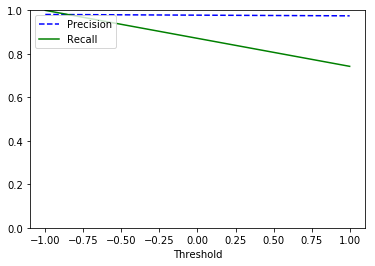

In [57]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_transform, y_pred)

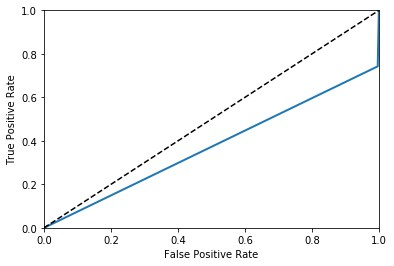

In [59]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_transform, y_pred)

0.37298469727597905

In [61]:
X_outliers = data_brut[y_pred == -1]
#X_outliers
len(X_outliers)

11739

In [62]:
X_normals = data_brut[y_pred == 1]
#X_normals
len(X_normals)

34725

In [63]:
len(X_normals) + len(X_outliers)

46464

In [64]:
FP = X_normals[X_normals[9] == "o"]
len(FP)

875

In [65]:
VP = X_normals[X_normals[9] == "n"]
len(VP)

33850

In [66]:
VN = X_outliers[X_outliers[9] == "o"]
len(VN)

3

In [67]:
FN = X_outliers[X_outliers[9] == "n"]
len(FN)

11736

In [68]:
precision_O = len(VN)/(len(FN) + len(VN))
precision_O

0.0002555583950932788

In [69]:
precision_N = len(VP)/(len(VP) + len(FP))
precision_N

0.9748020158387329

In [70]:
rappel_O = len(VN)/(len(FP) + len(VN))
rappel_O

0.003416856492027335

In [71]:
rappel_N = len(VP)/(len(VP) + len(FN))
rappel_N

0.7425525380599307